In [20]:
#绘制直方图模块
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
class Plotter:
    def __init__(self):
        pass
    def plot_histogram(self, data_list, num_bins=10, color='blue', title='Histogram',xlabel='Values',ylabel='Events',net = 'None',
                    text = 'None',need_log_scale=False,data_range=[-1,-1],image_info = 'None',data_points='0',alpha = 1,label = 'None'):
        # 计算范围
        data_min, data_max = np.min(data_list), np.max(data_list)
        if data_range == [-1,-1]:
            data_range = (data_min, data_max)
        else :
            data_range = data_range
        hist, bin_edges=np.histogram(data_list,bins=num_bins,range=data_range)
        max_bin_index = np.argmax(hist)
        max_bin_range = (bin_edges[max_bin_index], bin_edges[max_bin_index + 1])
        max_bin_freq = hist[max_bin_index] # 该 bin 的频率
        print(f"频率最高的 bin 的范围是: {max_bin_range}，频率为: {max_bin_freq}")
        plt.hist(data_list, histtype='step',bins=num_bins,range=data_range,align='mid',density=False,orientation='vertical',color=color, alpha = alpha, label = label)
        if need_log_scale:
            plt.yscale('log')
        plt.title(title,fontsize=16)
        plt.xlabel(xlabel,fontsize=16)
        plt.tick_params(labelsize=12)
        plt.ylabel(ylabel,fontsize=16)
        plt.xlim(0, 2)
        plt.legend()
        #在图中添加文本
        '''plt.text(0.5, -0.2, f"The most frequent data bin: {max_bin_range}\nThe std of the data is {np.std(data_list)}",
                ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        if text != 'None':
            plt.text(0.5, -0.3, text, ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        if image_info != 'None':
            plt.text(0.5, -0.4, 'Generated from '+image_info+ '. The num of data points is '+ data_points, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)
        if net != 'None':
            plt.text(0.5, -0.5, 'The network is '+net, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)'''
    
    def plot_scatter(self,list1,list2,title='scatter',color='r',s=1,xlabel='xlabel',ylabel='ylabel', text = 'None',net = 'None',
                    image_info = 'None',data_points='0'):
        fig, ax1=plt.subplots(figsize=(10,10))
        # 绘制对角线
        ax1.plot([min(list1), max(list1)], [min(list1), max(list1)], 'k--', label='X=Y')
        # 绘制散点图
        ax1.scatter(list1, list2, s=s, color=color)
        ax1.set_xlabel(xlabel)
        ax1.set_ylabel(ylabel)
        plt.tick_params(labelsize=12)
        ax1.set_title(title)
        # 添加文本
        plt.text(0.5, -0.1, text, ha='center', va='center', transform=plt.gca().transAxes)
        # 拟合散点图
        coefficients = np.polyfit(list1, list2, 1)
        polynomial = np.poly1d(coefficients)
        x_fit = np.linspace(min(list1), max(list1), 100)
        y_fit = polynomial(x_fit)
        if text != 'None':
            plt.text(0.5, -0.3, text, ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        if image_info != 'None':
            plt.text(0.5, -0.2, 'Generated from '+image_info+ '. The num of data points is '+ data_points, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)
        if net != 'None':
            plt.text(0.5, -0.4, 'The network is '+net, ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        # 绘制最小二乘拟合线
        ax1.plot(x_fit, y_fit, 'r-', label='Least Squares Fit', linewidth=2, alpha=0.7,color='b')
        
    def plot_error_pixel_map(self, true_list, predict_list, HIGTHT=56, WIDTH=56,text = 'None',net='None',
                    image_info = 'None',data_points='0'):
        # 计算误差矩阵
        Error_pixel_map = np.array(true_list) - np.array(predict_list)
        Error_pixel_map = Error_pixel_map.astype(np.float32).reshape(HIGTHT, WIDTH)
        # 创建颜色映射
        plt.tick_params(labelsize=12)
        cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['red', 'white', 'black'])
        norm = mcolors.TwoSlopeNorm(vmin=Error_pixel_map.min(), vcenter=0, vmax=Error_pixel_map.max())

        # 绘制误差像素图
        plt.figure(figsize=(10, 5))
        plt.imshow(Error_pixel_map, cmap=cmap, norm=norm)
        plt.colorbar(label='Error Value')
        plt.title('Error Pixel Map')
        if text != 'None':
            plt.text(0.5, -0.1, text, ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        if image_info != 'None':
            plt.text(0.5, -0.2, 'Generated from '+image_info+ '. The num of data points is '+ data_points, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)
        if net != 'None':
            plt.text(0.5, -0.3, 'The network is '+net, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)
        plt.tight_layout()
        plt.show()

In [12]:
import numpy as np

with open("errors\\errors\\CNN_90k_dis.txt", 'r') as file:
    lines = file.readlines()
differenceCNN_90k = np.array([line.strip() for line in lines], dtype=float)

with open("errors\\errors\\CNNwithSEBlock_90k_dis.txt", 'r') as file:
    lines = file.readlines()
differenceCNNwithSEBlock_90k = np.array([line.strip() for line in lines], dtype=float)

with open("errors\\errors\\CNN3D_90k_dis.txt", 'r') as file:
    lines = file.readlines()
differenceCNN3D_90k = np.array([line.strip() for line in lines], dtype=float)

with open("errors\\errors\\UNet_5m_dis.txt", 'r') as file:
    lines = file.readlines()
differenceUNet_5m = np.array([line.strip() for line in lines], dtype=float)

with open("errors\\errors\\UnetwithSEBlock_5m_dis.txt", 'r') as file:
    lines = file.readlines()
differenceUnetwithSEBlock_5m = np.array([line.strip() for line in lines], dtype=float)

with open("errors\\errors\\UnetwithSelfattention_5m_dis.txt", 'r') as file:
    lines = file.readlines()
differenceUnetwithSelfattention_5m = np.array([line.strip() for line in lines], dtype=float)

with open("errors\\errors\\Unet3D_5m_dis.txt", 'r') as file:
    lines = file.readlines()
differenceUnet3D_5m = np.array([line.strip() for line in lines], dtype=float)
print(differenceCNN_90k)

[0.24405608 0.34280128 0.3426245  0.31625547 0.21519205 0.23413914
 0.35564465 0.26616314 0.26720761 0.32869982 0.25158657 0.24569931
 0.27543183 0.24683143 0.20729768 0.30542174 0.39976218 0.20623441
 0.26886536 0.24935857 0.26073699 0.27409121 0.37872181 0.24632934
 0.28025491 0.30896439 0.29672925 0.31627139 0.40382963 0.26238122
 0.33575533 0.29180771 0.193755   0.29350574 0.35091101 0.26633686
 0.21982207 0.25943489 0.37489487 0.29674553 0.25533719 0.23321489
 0.22847053 0.370918   0.31144206 0.24106328 0.38851814 0.23175022
 0.30496384 0.32472947 0.26697537 0.35716036 0.48721876 0.20823947
 0.30613252 0.26593143 0.18728786 0.26431062 0.27630571 0.21430824
 0.23884725 0.27278459 0.39645354 0.29614903 0.15711365 0.26451142
 0.36577673 0.25827622 0.25538672 0.18391899 0.26790432 0.6364659
 0.25301526 0.26932163 0.21123881 0.23066971 0.24692208 0.31747299
 0.26294943 0.31921226 0.37308159 0.31234514 0.2419705  0.33574175
 0.20065076 0.20808512 0.2821237  0.23540098 0.34106408 0.23585

$重新设置range和bins$

频率最高的 bin 的范围是: (0.24, 0.28)，频率为: 264
频率最高的 bin 的范围是: (0.36, 0.4)，频率为: 203
频率最高的 bin 的范围是: (0.4, 0.44)，频率为: 184
频率最高的 bin 的范围是: (0.28, 0.32)，频率为: 215
频率最高的 bin 的范围是: (0.44, 0.48)，频率为: 181
频率最高的 bin 的范围是: (0.4, 0.44)，频率为: 174
频率最高的 bin 的范围是: (0.36, 0.4)，频率为: 197


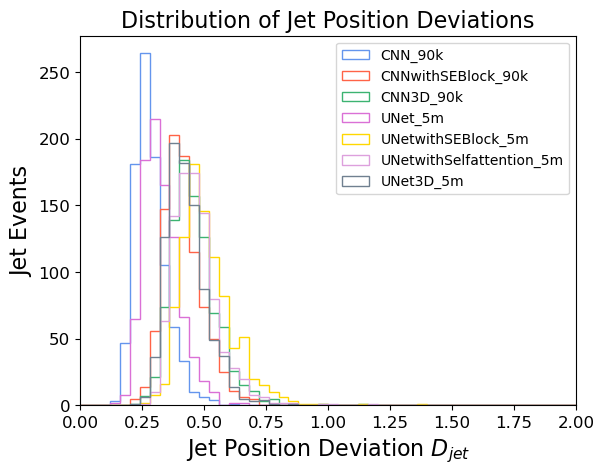

In [28]:
plotter = Plotter()
# plotter.plot_histogram(differenceCNN_90k, num_bins = 40, color='red', alpha = 0.8,label = 'CNN_90k', title = 'Distribution of jet position deviations predicted by different models'
#                        ,xlabel = 'Jet Position Deviation',ylabel='Jet Events',data_range=[0,2])
# plotter.plot_histogram(differenceCNNwithSEBlock_90k, num_bins = 40, color='green', alpha = 0.8,label = 'CNNwithSEBlock_90k', title = 'Distribution of jet position deviations predicted by different models'
#                        ,xlabel = 'Jet Position Deviation',ylabel='Jet Events',data_range=[0,2])
# plotter.plot_histogram(differenceCNN3D_90k, num_bins = 40, color='brown', alpha = 0.8,label = 'CNN3D_90k', title = 'Distribution of jet position deviations predicted by different models'
#                        ,xlabel = 'Jet Position Deviation',ylabel='Jet Events',data_range=[0,2])
# plotter.plot_histogram(differenceUNet_5m, num_bins = 40,  color='blue', alpha = 1,label = 'UNet_5m', title = 'Distribution of Jet Position Deviations'
#                        ,xlabel = 'Jet Position Deviation $D_{jet}$',ylabel='Jet Events',data_range=[0,2])
# plotter.plot_histogram(differenceUnetwithSEBlock_5m, num_bins = 40,  color='skyblue', alpha = 1,label = 'UNetwithSEBlock_5m', title = 'Distribution of Jet Position Deviations'
#                        ,xlabel = 'Jet Position Deviation $D_{jet}$',ylabel='Jet Events',data_range=[0,2])
# plotter.plot_histogram(differenceUnetwithSelfattention_5m, num_bins = 40,  color='purple', alpha = 1,label = 'UNetwithSelfattention_5m', title = 'Distribution of Jet Position Deviations'
#                        ,xlabel = 'Jet Position Deviation $D_{jet}$',ylabel='Jet Events',data_range=[0,2])
# plotter.plot_histogram(differenceUnet3D_5m, num_bins = 40,  color='black', alpha = 1,label = 'UNet3D_5m', title = 'Distribution of Jet Position Deviations'
#                        ,xlabel = 'Jet Position Deviation $D_{jet}$',ylabel='Jet Events',data_range=[0,2])
# plt.savefig('dis.svg', format='svg')


plotter.plot_histogram(differenceCNN_90k, num_bins = 50, color='cornflowerblue', alpha = 1,label = 'CNN_90k', title = 'Distribution of jet position deviations predicted by different models',
                        xlabel = 'Jet Position Deviation', ylabel='Jet Events', data_range=[0,2])
plotter.plot_histogram(differenceCNNwithSEBlock_90k, num_bins = 50, color='tomato', alpha = 1,label = 'CNNwithSEBlock_90k', title = 'Distribution of jet position deviations predicted by different models',
                        xlabel = 'Jet Position Deviation', ylabel='Jet Events', data_range=[0,2])
plotter.plot_histogram(differenceCNN3D_90k, num_bins = 50, color='mediumseagreen', alpha = 1,label = 'CNN3D_90k', title = 'Distribution of jet position deviations predicted by different models', 
                        xlabel = 'Jet Position Deviation', ylabel='Jet Events', data_range=[0,2])
plotter.plot_histogram(differenceUNet_5m, num_bins = 50,  color='orchid', alpha = 1,label = 'UNet_5m', title = 'Distribution of Jet Position Deviations',
                        xlabel = 'Jet Position Deviation $D_{jet}$', ylabel='Jet Events', data_range=[0,2])
plotter.plot_histogram(differenceUnetwithSEBlock_5m, num_bins = 50,  color='gold', alpha = 1,label = 'UNetwithSEBlock_5m', title = 'Distribution of Jet Position Deviations',
                        xlabel = 'Jet Position Deviation $D_{jet}$', ylabel='Jet Events', data_range=[0,2])
plotter.plot_histogram(differenceUnetwithSelfattention_5m, num_bins = 50,  color='plum', alpha = 1,label = 'UNetwithSelfattention_5m', title = 'Distribution of Jet Position Deviations',
                        xlabel = 'Jet Position Deviation $D_{jet}$', ylabel='Jet Events', data_range=[0,2])
plotter.plot_histogram(differenceUnet3D_5m, num_bins = 50,  color='slategray', alpha = 1,label = 'UNet3D_5m', title = 'Distribution of Jet Position Deviations',
                        xlabel = 'Jet Position Deviation $D_{jet}$', ylabel='Jet Events', data_range=[0,2])
plt.savefig('dis.svg', format='svg')


In [20]:
#绘制直方图模块
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
class Plotter:
    def __init__(self):
        pass
    def plot_histogram(self, data_list, num_bins=10, color='blue', title='Histogram',xlabel='Values',ylabel='Frequency',net = 'None',
                    text = 'None',need_log_scale=False,data_range=[-1,-1],image_info = 'None',data_points='0',alpha = 1,label = 'None'):
        # 计算范围
        data_min, data_max = np.min(data_list), np.max(data_list)
        if data_range == [-1,-1]:
            data_range = (data_min, data_max)
        else :
            data_range = range
        hist, bin_edges=np.histogram(data_list,bins=num_bins,range=data_range)
        max_bin_index = np.argmax(hist)
        max_bin_range = (bin_edges[max_bin_index], bin_edges[max_bin_index + 1])
        max_bin_freq = hist[max_bin_index] # 该 bin 的频率
        print(f"频率最高的 bin 的范围是: {max_bin_range}，频率为: {max_bin_freq}")
        plt.hist(data_list,bins=num_bins,range=data_range,histtype='stepfilled',align='mid',orientation='vertical',color=color, alpha = alpha, label = label)
        if need_log_scale:
            plt.yscale('log')
        plt.title(title,fontsize=13)
        plt.xlabel(xlabel,fontsize=12)
        plt.tick_params(labelsize=12)
        plt.ylabel(ylabel,fontsize=12)
        plt.xlim(-1, 3)
        plt.legend()
        #在图中添加文本
        '''plt.text(0.5, -0.2, f"The most frequent data bin: {max_bin_range}\nThe std of the data is {np.std(data_list)}",
                ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        if text != 'None':
            plt.text(0.5, -0.3, text, ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        if image_info != 'None':
            plt.text(0.5, -0.4, 'Generated from '+image_info+ '. The num of data points is '+ data_points, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)
        if net != 'None':
            plt.text(0.5, -0.5, 'The network is '+net, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)'''
    
    def plot_scatter(self,list1,list2,title='scatter',color='r',s=1,xlabel='xlabel',ylabel='ylabel', text = 'None',net = 'None',
                    image_info = 'None',data_points='0'):
        fig, ax1=plt.subplots(figsize=(10,10))
        # 绘制对角线
        ax1.plot([min(list1), max(list1)], [min(list1), max(list1)], 'k--', label='X=Y')
        # 绘制散点图
        ax1.scatter(list1, list2, s=s, color=color)
        ax1.set_xlabel(xlabel)
        ax1.set_ylabel(ylabel)
        plt.tick_params(labelsize=12)
        ax1.set_title(title)
        # 添加文本
        plt.text(0.5, -0.1, text, ha='center', va='center', transform=plt.gca().transAxes)
        # 拟合散点图
        coefficients = np.polyfit(list1, list2, 1)
        polynomial = np.poly1d(coefficients)
        x_fit = np.linspace(min(list1), max(list1), 100)
        y_fit = polynomial(x_fit)
        if text != 'None':
            plt.text(0.5, -0.3, text, ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        if image_info != 'None':
            plt.text(0.5, -0.2, 'Generated from '+image_info+ '. The num of data points is '+ data_points, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)
        if net != 'None':
            plt.text(0.5, -0.4, 'The network is '+net, ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        # 绘制最小二乘拟合线
        ax1.plot(x_fit, y_fit, 'r-', label='Least Squares Fit', linewidth=2, alpha=0.7,color='b')
        
    def plot_error_pixel_map(self, true_list, predict_list, HIGTHT=56, WIDTH=56,text = 'None',net='None',
                    image_info = 'None',data_points='0'):
        # 计算误差矩阵
        Error_pixel_map = np.array(true_list) - np.array(predict_list)
        Error_pixel_map = Error_pixel_map.astype(np.float32).reshape(HIGTHT, WIDTH)
        # 创建颜色映射
        plt.tick_params(labelsize=12)
        cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['red', 'white', 'black'])
        norm = mcolors.TwoSlopeNorm(vmin=Error_pixel_map.min(), vcenter=0, vmax=Error_pixel_map.max())

        # 绘制误差像素图
        plt.figure(figsize=(10, 5))
        plt.imshow(Error_pixel_map, cmap=cmap, norm=norm)
        plt.colorbar(label='Error Value')
        plt.title('Error Pixel Map')
        if text != 'None':
            plt.text(0.5, -0.1, text, ha='center', va='center', transform=plt.gca().transAxes,fontsize=12)
        if image_info != 'None':
            plt.text(0.5, -0.2, 'Generated from '+image_info+ '. The num of data points is '+ data_points, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)
        if net != 'None':
            plt.text(0.5, -0.3, 'The network is '+net, ha='center', va='center', 
                    transform=plt.gca().transAxes,fontsize=12)
        plt.tight_layout()
        plt.show()

In [ ]:
import numpy as np

with open("errors\\errors\\CNN_90k_dis.txt", 'r') as file:
    lines = file.readlines()
DifferenceCNN_90k = np.array([line.strip() for line in lines], dtype=float)

with open("errors\\errors\\CNNwithSEBlock_90k_dis.txt", 'r') as file:
    lines = file.readlines()
DifferenceCNNwithSEBlock_90k = np.array([line.strip() for line in lines], dtype=float)

with open("errors\\errors\\CNN3D_90k_dis.txt", 'r') as file:
    lines = file.readlines()
DifferenceCNN3D_90k = np.array([line.strip() for line in lines], dtype=float)

with open("errors\\errors\\UNet_5m_dis.txt", 'r') as file:
    lines = file.readlines()
DifferenceUNet_5m = np.array([line.strip() for line in lines], dtype=float)

with open("errors\\errors\\UnetwithSEBlock_5m_dis.txt", 'r') as file:
    lines = file.readlines()
DifferenceUnetwithSEBlock_5m = np.array([line.strip() for line in lines], dtype=float)

with open("errors\\errors\\UnetwithSelfattention_5m_dis.txt", 'r') as file:
    lines = file.readlines()
DifferenceUnetwithSelfattention_5m = np.array([line.strip() for line in lines], dtype=float)

with open("errors\\errors\\Unet3D_5m_dis.txt", 'r') as file:
    lines = file.readlines()
DifferenceUnet3D_5m = np.array([line.strip() for line in lines], dtype=float)

print(len(DifferenceCNN_90k))
print(len(DifferenceCNNwithSEBlock_90k))
print(len(DifferenceCNN3D_90k))
print(len(DifferenceUNet_5m))
print(len(DifferenceUnetwithSEBlock_5m))
print(len(DifferenceUnetwithSelfattention_5m))
print(len(DifferenceUnet3D_5m))
# print(max(DifferenceUNet_5m), min(DifferenceUNet_5m))
# print(DifferenceUNet_5m)

899
899
899
899
899
899
899
0.6700460342853949 0.13660677980263014
[0.24564975 0.31102395 0.29389736 0.3139704  0.40047263 0.39736775
 0.29451575 0.29541663 0.33379469 0.43590199 0.31125191 0.43393042
 0.3237239  0.42086955 0.25587062 0.49082454 0.35374863 0.29534639
 0.23425785 0.38799032 0.3007426  0.239339   0.29500599 0.25498173
 0.27020114 0.20724257 0.28779144 0.3487292  0.28085624 0.45485023
 0.27282166 0.32268555 0.20543589 0.31385885 0.36706094 0.37283385
 0.38470931 0.31436333 0.25158394 0.22759677 0.4815041  0.32204474
 0.2275093  0.33859262 0.39071867 0.26667191 0.30552663 0.29800899
 0.3292011  0.33775326 0.45796651 0.32160131 0.39293927 0.35640424
 0.25659004 0.29617665 0.2515854  0.60464288 0.27004767 0.39803568
 0.30438547 0.26317492 0.31810638 0.33141459 0.27713074 0.4242097
 0.38141855 0.32314887 0.21928576 0.42271131 0.27982492 0.32458799
 0.28816424 0.28016587 0.34660145 0.24382113 0.31504962 0.20782501
 0.29787485 0.27383639 0.40932888 0.26723089 0.37946436 0.29559

C:\Users\汪雨\AppData\Local\Temp\ipykernel_7352\1829361265.py:28: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_000, _ = curve_fit(gaussian, bin_centers_000, hist_000, p0=[0, 0.01, 1])
C:\Users\汪雨\AppData\Local\Temp\ipykernel_7352\1829361265.py:29: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_005, _ = curve_fit(gaussian, bin_centers_005, hist_005, p0=[0, 0.01, 1])
C:\Users\汪雨\AppData\Local\Temp\ipykernel_7352\1829361265.py:30: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_010, _ = curve_fit(gaussian, bin_centers_010, hist_010, p0=[0, 0.01, 1])
C:\Users\汪雨\AppData\Local\Temp\ipykernel_7352\1829361265.py:31: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_015, _ = curve_fit(gaussian, bin_centers_015, hist_015, p0=[0, 0.01, 1])
C:\Users\汪雨\AppData\Local\Temp\ipykernel_7352\1829361265.py:32: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_020, _ =

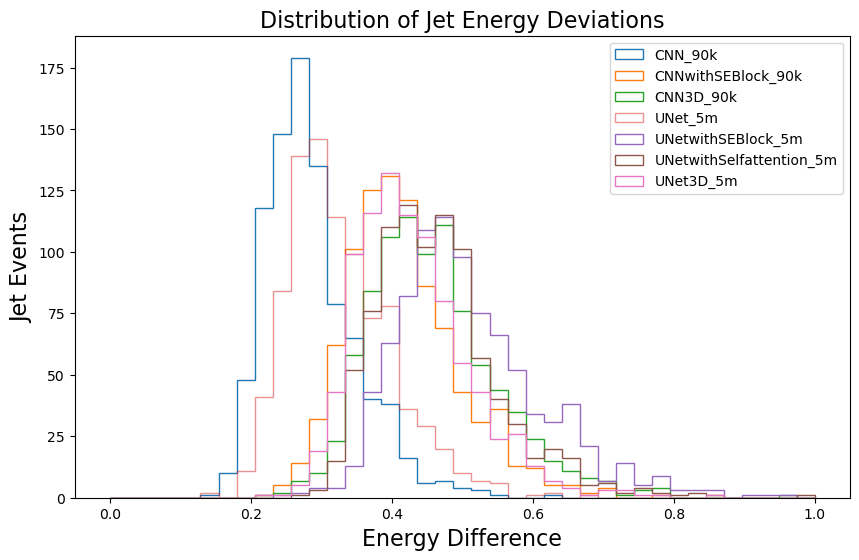

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

# Define the Gaussian function
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
# Calculate the histogram data
bins = np.linspace(-0, 1, 40)
hist_000, bin_edges_000 = np.histogram(DifferenceCNN_90k, bins=bins, density=False)
hist_005, bin_edges_005 = np.histogram(DifferenceCNNwithSEBlock_90k, bins=bins, density=False)
hist_010, bin_edges_010 = np.histogram(DifferenceCNN3D_90k, bins=bins, density=False)
hist_015, bin_edges_015 = np.histogram(DifferenceUNet_5m, bins=bins, density=False)
hist_020, bin_edges_020 = np.histogram(DifferenceUnetwithSEBlock_5m, bins=bins, density=False)
hist_020, bin_edges_025 = np.histogram(DifferenceUnetwithSelfattention_5m, bins=bins, density=False)
hist_020, bin_edges_030 = np.histogram(DifferenceUnet3D_5m, bins=bins, density=False)

bin_centers_000 = (bin_edges_000[:-1] + bin_edges_000[1:]) / 2
bin_centers_005 = (bin_edges_005[:-1] + bin_edges_005[1:]) / 2
bin_centers_010 = (bin_edges_010[:-1] + bin_edges_010[1:]) / 2
bin_centers_015 = (bin_edges_015[:-1] + bin_edges_015[1:]) / 2
bin_centers_020 = (bin_edges_020[:-1] + bin_edges_020[1:]) / 2
bin_centers_025 = (bin_edges_025[:-1] + bin_edges_025[1:]) / 2
bin_centers_030 = (bin_edges_030[:-1] + bin_edges_030[1:]) / 2

# Fit the Gaussian function to the histogram data
popt_000, _ = curve_fit(gaussian, bin_centers_000, hist_000, p0=[0, 0.01, 1])
popt_005, _ = curve_fit(gaussian, bin_centers_005, hist_005, p0=[0, 0.01, 1])
popt_010, _ = curve_fit(gaussian, bin_centers_010, hist_010, p0=[0, 0.01, 1])
popt_015, _ = curve_fit(gaussian, bin_centers_015, hist_015, p0=[0, 0.01, 1])
popt_020, _ = curve_fit(gaussian, bin_centers_020, hist_020, p0=[0, 0.01, 1])
popt_025, _ = curve_fit(gaussian, bin_centers_025, hist_020, p0=[0, 0.01, 1])
popt_030, _ = curve_fit(gaussian, bin_centers_030, hist_020, p0=[0, 0.01, 1])

x = np.linspace(-5, 5, 500)  # 从 -1 到 1 的范围内取 500 个点
# Plot the histograms and the fitted Gaussian functions
plt.figure(figsize=(10, 6))
plt.hist(DifferenceCNN_90k, bins=bins, alpha=1, label='CNN_90k', density=False,histtype='step')
plt.hist(DifferenceCNNwithSEBlock_90k, bins=bins, alpha=1, label='CNNwithSEBlock_90k', density=False,histtype='step')
plt.hist(DifferenceCNN3D_90k, bins=bins, alpha=1, label='CNN3D_90k', density=False,histtype='step')
plt.hist(DifferenceUNet_5m, bins=bins, alpha=0.5, label='UNet_5m', density=False,histtype='step')
plt.hist(DifferenceUnetwithSEBlock_5m, bins=bins, alpha=1, label='UNetwithSEBlock_5m', density=False,histtype='step')
plt.hist(DifferenceUnetwithSelfattention_5m, bins=bins, alpha=1, label='UNetwithSelfattention_5m', density=False,histtype='step')
plt.hist(DifferenceUnet3D_5m, bins=bins, alpha=1, label='UNet3D_5m', density=False,histtype='step')
'''plt.plot(bin_centers_000,gaussian(bin_centers_000, *popt_000), label=f'CNN: $\mu$={popt_000[0]:.5f}, $\sigma$={popt_000[1]:.5f}')
plt.plot(bin_centers_005,gaussian(bin_centers_005, *popt_005), label=f'U-Net with self-attention: $\mu$={popt_005[0]:.5f}, $\sigma$={popt_005[1]:.5f}')
plt.plot(x, gaussian(x, *popt_010), label=f'U-Net: $\mu$={popt_010[0]:.5f}, $\sigma$={popt_010[1]:.5f}')
#plt.plot(bin_centers_015, gaussian(bin_centers_015, *popt_015), label=f'RNN: $\mu$={popt_015[0]:.5f}, $\sigma$={popt_015[1]:.5f}')
plt.plot(x, gaussian(x, *popt_020), label=f'RNN: $\mu$={popt_020[0]:.5f}, $\sigma$={popt_020[1]:.5f}')'''
plt.xlabel('Energy Difference',fontsize = 16)
plt.ylabel('Jet Events', fontsize = 16)
plt.legend(loc='upper right')
# plt.xlim(-10, 10)
plt.title('Distribution of Jet Energy Deviations', fontsize = 16)
plt.savefig('energy.svg', format='svg')
plt.show()

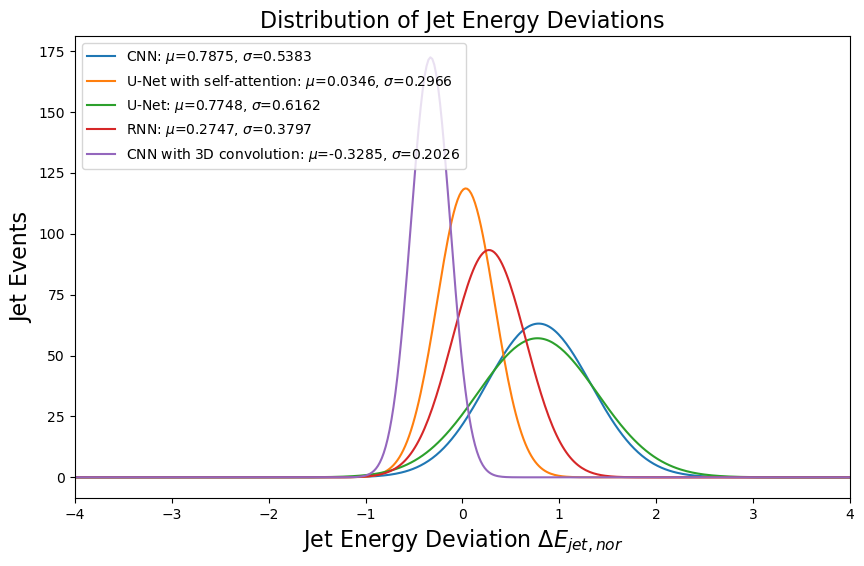

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Gaussian function
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# Calculate the histogram data
bins = np.linspace(-5, 5, 100)  # 统一 bin 边界
hist_000, bin_edges_000 = np.histogram(differenceCNN, bins=bins, density=False)
hist_005, bin_edges_005 = np.histogram(differenceUTran, bins=bins, density=False)
hist_010, bin_edges_010 = np.histogram(differenceUNet, bins=bins, density=False)
hist_020, bin_edges_020 = np.histogram(differenceRNNseq2seq, bins=bins, density=False)
hist_025, bin_edges_025 = np.histogram(differenceCNN_3D, bins=bins, density=False)

# Calculate bin centers
bin_centers_000 = (bin_edges_000[:-1] + bin_edges_000[1:]) / 2
bin_centers_005 = (bin_edges_005[:-1] + bin_edges_005[1:]) / 2
bin_centers_010 = (bin_edges_010[:-1] + bin_edges_010[1:]) / 2
bin_centers_020 = (bin_edges_020[:-1] + bin_edges_020[1:]) / 2
bin_centers_025 = (bin_edges_025[:-1] + bin_edges_025[1:]) / 2

# Fit the Gaussian function to the histogram data
popt_000, _ = curve_fit(gaussian, bin_centers_000, hist_000, p0=[0, 0.1, np.max(hist_000)])
popt_005, _ = curve_fit(gaussian, bin_centers_005, hist_005, p0=[0, 0.1, np.max(hist_005)])
popt_010, _ = curve_fit(gaussian, bin_centers_010, hist_010, p0=[0, 0.1, np.max(hist_010)])
popt_020, _ = curve_fit(gaussian, bin_centers_020, hist_020, p0=[0, 0.1, np.max(hist_020)])
popt_025, _ = curve_fit(gaussian, bin_centers_025, hist_025, p0=[0, 0.1, np.max(hist_025)])

# Create x values for plotting Gaussian curves
x = np.linspace(-5, 5, 500)

# Plot the histograms and the fitted Gaussian functions
plt.figure(figsize=(10, 6))

'''# Plot histograms with step
plt.hist(differenceCNN, bins=bins, alpha=1, label='CNN', density=False, histtype='step')
plt.hist(differenceUTran, bins=bins, alpha=1, label='UTran', density=False, histtype='step')
plt.hist(differenceUNet, bins=bins, alpha=1, label='UNet', density=False, histtype='step')
plt.hist(differenceRNNseq2seq, bins=bins, alpha=1, label='RNN', density=False, histtype='step')'''

# Plot Gaussian curves
plt.plot(x, gaussian(x, *popt_000), label=f'CNN: $\mu$={popt_000[0]:.4f}, $\sigma$={popt_000[1]:.4f}')
plt.plot(x, gaussian(x, *popt_005), label=f'U-Net with self-attention: $\mu$={popt_005[0]:.4f}, $\sigma$={popt_005[1]:.4f}')
plt.plot(x, gaussian(x, *popt_010), label=f'U-Net: $\mu$={popt_010[0]:.4f}, $\sigma$={popt_010[1]:.4f}')
plt.plot(x, gaussian(x, *popt_020), label=f'RNN: $\mu$={popt_020[0]:.4f}, $\sigma$={popt_020[1]:.4f}')
plt.plot(x, gaussian(x, *popt_025), label=f'CNN with 3D convolution: $\mu$={popt_025[0]:.4f}, $\sigma$={popt_025[1]:.4f}')

# Labeling
plt.xlabel('Jet Energy Deviation $\Delta E_{jet,nor}$', fontsize=16)
plt.ylabel('Jet Events', fontsize=16)
plt.legend(loc='upper left')
plt.xlim(-4, 4)
plt.title('Distribution of Jet Energy Deviations', fontsize=16)

# Save and show the plot
plt.savefig('energy.svg', format='svg')
plt.show()


truth和predict的形状都是（10000，1，56，56）

In [ ]:
class Model:
    def __init__(self):
        Energy_residual_2-5 = 

文件: plot\CNN_90k_energy_residual_2to5.txt -> 均值: 0.04, 方差: 0.20, 最大值: 0.9997233152389526, 最小值: -1.4016938209533691
文件: plot\CNN_90k_energy_residual_5to10.txt -> 均值: 0.04, 方差: 0.14, 最大值: 0.999574601650238, 最小值: -0.9155983328819275
文件: plot\CNN_90k_energy_residual_10toinfty.txt -> 均值: 0.07, 方差: 0.10, 最大值: 0.9976465106010437, 最小值: -0.2248949557542801
文件: plot\CNNwithSEBlock_90k_energy_residual_2to5.txt -> 均值: 0.04, 方差: 0.18, 最大值: 0.9780866503715515, 最小值: -1.3883997201919556
文件: plot\CNNwithSEBlock_90k_energy_residual_5to10.txt -> 均值: 0.04, 方差: 0.13, 最大值: 0.9800776243209839, 最小值: -0.9445104598999023
文件: plot\CNNwithSEBlock_90k_energy_residual_10toinfty.txt -> 均值: 0.06, 方差: 0.10, 最大值: 0.3861861824989319, 最小值: -0.19675105810165405
文件: plot\CNN3D_90k_energy_residual_2to5.txt -> 均值: 0.03, 方差: 0.17, 最大值: 0.9909701943397522, 最小值: -1.425726294517517
文件: plot\CNN3D_90k_energy_residual_5to10.txt -> 均值: 0.03, 方差: 0.12, 最大值: 0.9650800228118896, 最小值: -0.8563054203987122
文件: plot\CNN3D_90k_energy_resid

C:\Users\汪雨\AppData\Local\Temp\ipykernel_30736\329492338.py:107: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(double_gaussian, bin_centers, hist_counts, p0=p0)


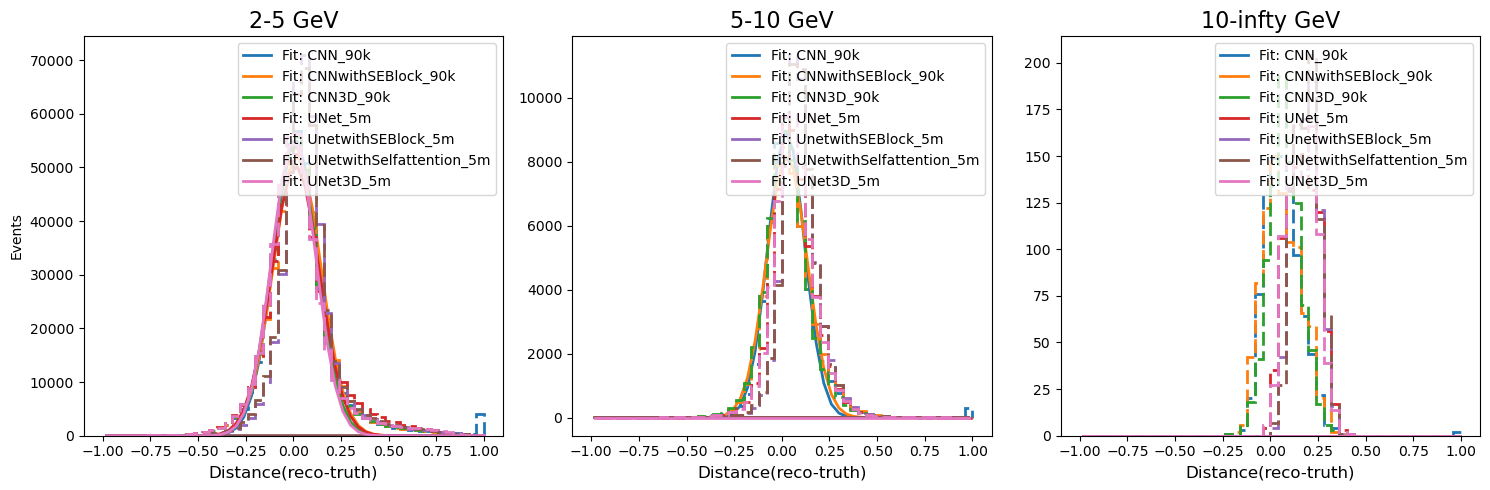

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

# 结构体表示每种方法的属性
class MethodData:
    def __init__(self, name, color, linestyle, linewidth, rms, data=None):
        self.name = name
        self.color = color
        self.linestyle = linestyle
        self.linewidth = linewidth
        self.rms = rms
        self.data = data if data is not None else []

# 读取数据文件的函数
def load_data_from_file(file_path):
    """
    读取文本文件数据（假设每行数据为数字）
    文件格式假设为：每行包含数据，代表每个不同的分布
    """
    data = np.loadtxt(file_path)
    mean = np.mean(data)
    std_dev = np.std(data)
    max_val = np.max(data)
    min_val = np.min(data)
    print(f"文件: {file_path} -> 均值: {mean:.2f}, 方差: {std_dev:.2f}, 最大值: {max_val}, 最小值: {min_val}")
    return data, std_dev

def double_gaussian(x, A1, mu1, sigma1, A2, mu2, sigma2):
    gauss1 = A1 * np.exp(-((x - mu1)**2) / (2 * sigma1**2))
    gauss2 = A2 * np.exp(-((x - mu2)**2) / (2 * sigma2**2))
    return gauss1 + gauss2

def weighted_gaussian_params(A1, mu1, sigma1, A2, mu2, sigma2):
    """
    根据双高斯的拟合参数，计算加权后的整体μ、σ。
    total_amp = A1 + A2
    w_mu = (A1*mu1 + A2*mu2) / total_amp
    w_sigma^2 = (A1*(sigma1^2 + mu1^2) + A2*(sigma2^2 + mu2^2))/total_amp - w_mu^2
    """
    total_amp = A1 + A2
    w_mu = (A1*mu1 + A2*mu2) / total_amp
    w_var = (A1*(sigma1**2 + mu1**2) + A2*(sigma2**2 + mu2**2))/total_amp - w_mu**2
    w_sigma = np.sqrt(w_var) if w_var > 0 else 0.0
    return w_mu, w_sigma

# 方法的配置
methods = {
    "CNN_90k":                  MethodData(name="CNN_90k", color="C0", linestyle=(5,(5,1)), linewidth=2, rms=[0.36, 0.68, 0.09, 0.08]),
    "CNNwithSEBlock_90k":       MethodData(name="CNNwithSEBlock_90k", color="C1", linestyle=(5,(5,1)), linewidth=2, rms=[0.20, 0.15, 0.10, 0.09]),
    "CNN3D_90k":                MethodData(name="CNN3D_90k", color="C2", linestyle=(5,(5,1)), linewidth=2, rms=[0.23, 0.16, 0.11, 0.10]),
    "UNet_5m":                  MethodData(name="UNet_5m", color="C3", linestyle=(5,(5,1)), linewidth=2, rms=[0.22, 0.16, 0.12, 0.11]),
    "UnetwithSEBlock_5m":       MethodData(name="UnetwithSEBlock_5m", color="C4", linestyle=(5,(5,1)), linewidth=2, rms=[0.22, 0.16, 0.12, 0.11]),
    "UNetwithSelfattention_5m": MethodData(name="UNetwithSelfattention_5m", color="C5", linestyle=(5,(5,1)), linewidth=2, rms=[0.22, 0.16, 0.12, 0.11]),
    "UNet3D_5m":                MethodData(name="UNet3D_5m", color="C6", linestyle=(5,(5,1)), linewidth=2, rms=[0.22, 0.16, 0.12, 0.11]),
}

# 假设能源区间
energies = ["2-5", "5-10", "10-infty"]

# 读取每个方法的实际数据
for method_name, method in methods.items():
    for i, energy in enumerate(energies):
        # 构造文件路径
        file_name = f"{method_name}_energy_residual_{energy.replace('-', 'to')}.txt"
        file_path = os.path.join("plot", file_name)
        
        # 检查文件是否存在并加载数据
        if os.path.exists(file_path):
            data, std_dev = load_data_from_file(file_path)
            std_dev = round(std_dev, 2)  # 保留两位小数
            method.data.append(data)  # 保存数据
            method.rms[i] = std_dev   # 更新 rms 数值
        else:
            print(f"警告：文件 {file_path} 未找到")

# 绘制图形
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False)
bins_range = [1, 1, 1, 1]
for i, ax in enumerate(axes):
    max_hight = 0
    max_width = 0
    for j, (method_name, method) in enumerate(methods.items()):
        data = method.data[i] if len(method.data) > i else []
        
        hist = ax.hist(data,
                bins=50,
                range=(-bins_range[i], bins_range[i]),
                histtype='step',
                color=method.color,
                linestyle=method.linestyle,
                linewidth=method.linewidth)
        
        # 获取直方图的 bin 中心
        hist_counts, bin_edges = np.histogram(data, bins=50, range=(-bins_range[i], bins_range[i]))
        bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
        
        # 拟合双高斯
        A_guess = max(hist_counts)  # 最大计数
        mean_guess = np.mean(data)
        std_guess = np.std(data)
        p0 = [A_guess/2, mean_guess-1, std_guess,
              A_guess/2, mean_guess+3, std_guess]
        
        try:
            popt, _ = curve_fit(double_gaussian, bin_centers, hist_counts, p0=p0)
            fit_y = double_gaussian(bin_centers, *popt)
            ax.plot(bin_centers, fit_y, linestyle='-', color=method.color, linewidth=2, label=f"Fit: {method_name}")
        except RuntimeError:
            print(f"拟合失败: {method_name} 能量区间: {energies[i]}")


    ax.set_title(f"{energies[i]} GeV", fontsize=16)
    ax.set_xlabel("Distance(reco-truth)", fontsize=12)
    if i == 0:
        ax.set_ylabel("Events")
    # ax.set_xlim(-max_width, max_width)
    # ax.set_ylim(0, max_hight * 2.2)

    ax.legend(loc="upper right")

plt.tight_layout()

plt.savefig("distance_comparison.svg", format="svg")  

plt.show()

文件: plot\CNN_90k_energy_residual_2to5.txt -> 均值: 0.04, 方差: 0.20, 最大值: 0.9997233152389526, 最小值: -1.4016938209533691
文件: plot\CNN_90k_energy_residual_5to10.txt -> 均值: 0.04, 方差: 0.14, 最大值: 0.999574601650238, 最小值: -0.9155983328819275
文件: plot\CNN_90k_energy_residual_10toinfty.txt -> 均值: 0.07, 方差: 0.10, 最大值: 0.9976465106010437, 最小值: -0.2248949557542801
文件: plot\CNNwithSEBlock_90k_energy_residual_2to5.txt -> 均值: 0.04, 方差: 0.18, 最大值: 0.9780866503715515, 最小值: -1.3883997201919556
文件: plot\CNNwithSEBlock_90k_energy_residual_5to10.txt -> 均值: 0.04, 方差: 0.13, 最大值: 0.9800776243209839, 最小值: -0.9445104598999023
文件: plot\CNNwithSEBlock_90k_energy_residual_10toinfty.txt -> 均值: 0.06, 方差: 0.10, 最大值: 0.3861861824989319, 最小值: -0.19675105810165405
文件: plot\CNN3D_90k_energy_residual_2to5.txt -> 均值: 0.03, 方差: 0.17, 最大值: 0.9909701943397522, 最小值: -1.425726294517517
文件: plot\CNN3D_90k_energy_residual_5to10.txt -> 均值: 0.03, 方差: 0.12, 最大值: 0.9650800228118896, 最小值: -0.8563054203987122
文件: plot\CNN3D_90k_energy_resid

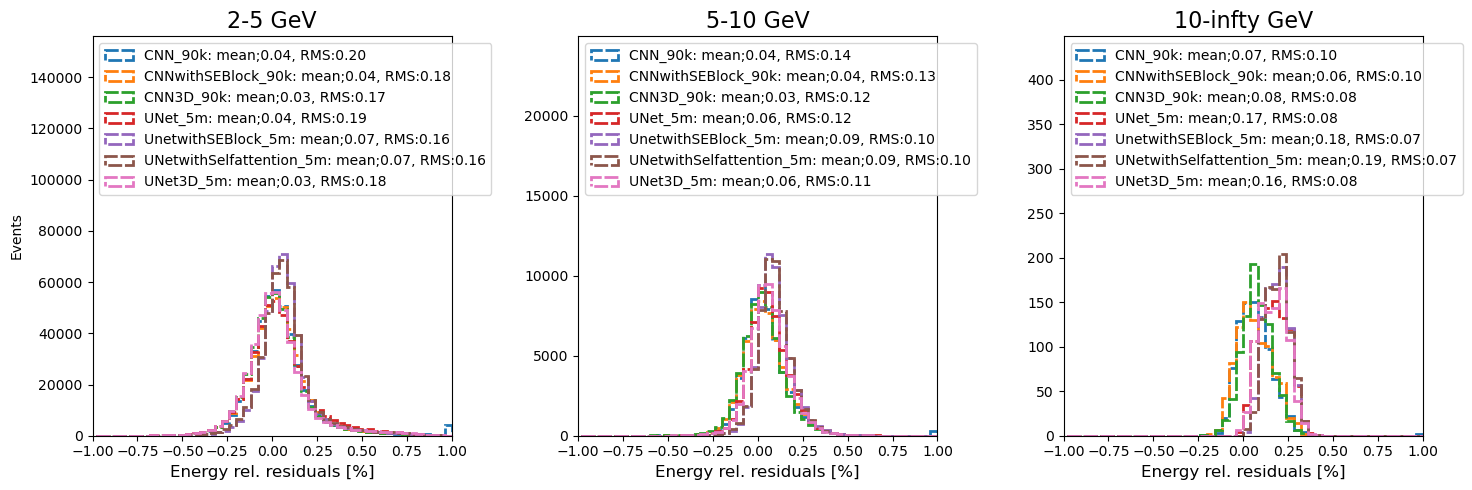

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

# 结构体表示每种方法的属性
class MethodData:
    def __init__(self, name, color, linestyle, linewidth, rms, data=None):
        self.name = name
        self.color = color
        self.linestyle = linestyle
        self.linewidth = linewidth
        self.rms = rms
        self.data = data if data is not None else []

# 读取数据文件的函数
def load_data_from_file(file_path):
    """
    读取文本文件数据（假设每行数据为数字）
    文件格式假设为：每行包含数据，代表每个不同的分布
    """
    data = np.loadtxt(file_path)
    mean = np.mean(data)
    std_dev = np.std(data)
    max_val = np.max(data)
    min_val = np.min(data)
    print(f"文件: {file_path} -> 均值: {mean:.2f}, 方差: {std_dev:.2f}, 最大值: {max_val}, 最小值: {min_val}")
    return data, std_dev

def double_gaussian(x, A1, mu1, sigma1, A2, mu2, sigma2):
    gauss1 = A1 * np.exp(-((x - mu1)**2) / (2 * sigma1**2))
    gauss2 = A2 * np.exp(-((x - mu2)**2) / (2 * sigma2**2))
    return gauss1 + gauss2

def weighted_gaussian_params(A1, mu1, sigma1, A2, mu2, sigma2):
    """
    根据双高斯的拟合参数，计算加权后的整体μ、σ。
    total_amp = A1 + A2
    w_mu = (A1*mu1 + A2*mu2) / total_amp
    w_sigma^2 = (A1*(sigma1^2 + mu1^2) + A2*(sigma2^2 + mu2^2))/total_amp - w_mu^2
    """
    total_amp = A1 + A2
    w_mu = (A1*mu1 + A2*mu2) / total_amp
    w_var = (A1*(sigma1**2 + mu1**2) + A2*(sigma2**2 + mu2**2))/total_amp - w_mu**2
    w_sigma = np.sqrt(w_var) if w_var > 0 else 0.0
    return w_mu, w_sigma

# 方法的配置
methods = {
    "CNN_90k":                  MethodData(name="CNN_90k", color="C0", linestyle=(5,(5,1)), linewidth=2, rms=[0.36, 0.68, 0.09, 0.08]),
    "CNNwithSEBlock_90k":       MethodData(name="CNNwithSEBlock_90k", color="C1", linestyle=(5,(5,1)), linewidth=2, rms=[0.20, 0.15, 0.10, 0.09]),
    "CNN3D_90k":                MethodData(name="CNN3D_90k", color="C2", linestyle=(5,(5,1)), linewidth=2, rms=[0.23, 0.16, 0.11, 0.10]),
    "UNet_5m":                  MethodData(name="UNet_5m", color="C3", linestyle=(5,(5,1)), linewidth=2, rms=[0.22, 0.16, 0.12, 0.11]),
    "UnetwithSEBlock_5m":       MethodData(name="UnetwithSEBlock_5m", color="C4", linestyle=(5,(5,1)), linewidth=2, rms=[0.22, 0.16, 0.12, 0.11]),
    "UNetwithSelfattention_5m": MethodData(name="UNetwithSelfattention_5m", color="C5", linestyle=(5,(5,1)), linewidth=2, rms=[0.22, 0.16, 0.12, 0.11]),
    "UNet3D_5m":                MethodData(name="UNet3D_5m", color="C6", linestyle=(5,(5,1)), linewidth=2, rms=[0.22, 0.16, 0.12, 0.11]),
}

# 假设能源区间
energies = ["2-5", "5-10", "10-infty"]

# 读取每个方法的实际数据
for method_name, method in methods.items():
    for i, energy in enumerate(energies):
        # 构造文件路径
        file_name = f"{method_name}_energy_residual_{energy.replace('-', 'to')}.txt"
        file_path = os.path.join("plot", file_name)
        
        # 检查文件是否存在并加载数据
        if os.path.exists(file_path):
            data, std_dev = load_data_from_file(file_path)
            std_dev = round(std_dev, 2)  # 保留两位小数
            method.data.append(data)  # 保存数据
            method.rms[i] = std_dev   # 更新 rms 数值
        else:
            print(f"警告：文件 {file_path} 未找到")

# 绘制图形
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False)
bins_range = [1, 1, 1, 1]
for i, ax in enumerate(axes):
    max_hight = 0
    max_width = 0
    for j, (method_name, method) in enumerate(methods.items()):
        # 获取每个方法在该能量区间的数据
        data = method.data[i] if len(method.data) > i else []
        
        hist = ax.hist(data,
                bins=50,
                range=(-bins_range[i], bins_range[i]),
                histtype='step',
                color=method.color,
                linestyle=method.linestyle,
                linewidth=method.linewidth,
                label=f"{method_name}: mean;{np.mean(data):.2f}, RMS:{np.std(data):.2f}")
        if len(hist[0]) > 0 and max(hist[0]) > max_hight:
            max_hight = max(hist[0])
        if len(hist[1]) > 0 and max(hist[1]) > max_width:
            max_width = max(hist[1])
            
        bins = 50
        range_min, range_max = -1, 1 
        hist_counts, bin_edges = np.histogram(data, bins=bins, range=(range_min, range_max))
        bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])


    ax.set_title(f"{energies[i]} GeV", fontsize=16)
    ax.set_xlabel("Energy rel. residuals [%]", fontsize=12)
    if i == 0:
        ax.set_ylabel("Events")
    ax.set_xlim(-max_width, max_width)
    ax.set_ylim(0, max_hight * 2.2)

    ax.legend(loc="upper left")

plt.tight_layout()

plt.savefig("energy residuals.svg", format="svg")  

plt.show()

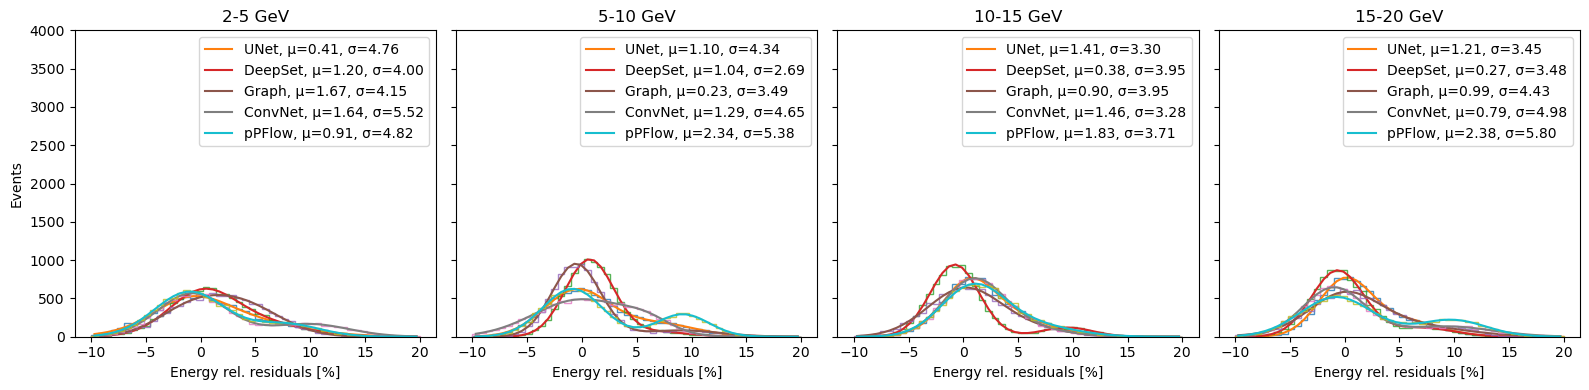

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def double_gaussian(x, A1, mu1, sigma1, A2, mu2, sigma2):
    gauss1 = A1 * np.exp(-((x - mu1)**2) / (2 * sigma1**2))
    gauss2 = A2 * np.exp(-((x - mu2)**2) / (2 * sigma2**2))
    return gauss1 + gauss2

def weighted_gaussian_params(A1, mu1, sigma1, A2, mu2, sigma2):
    """
    根据双高斯的拟合参数，计算加权后的整体μ、σ。
    total_amp = A1 + A2
    w_mu = (A1*mu1 + A2*mu2) / total_amp
    w_sigma^2 = (A1*(sigma1^2 + mu1^2) + A2*(sigma2^2 + mu2^2))/total_amp - w_mu^2
    """
    total_amp = A1 + A2
    w_mu = (A1*mu1 + A2*mu2) / total_amp
    w_var = (A1*(sigma1**2 + mu1**2) + A2*(sigma2**2 + mu2**2))/total_amp - w_mu**2
    w_sigma = np.sqrt(w_var) if w_var > 0 else 0.0
    return w_mu, w_sigma

np.random.seed(42)

# 四个能区
energy_bins = ["2-5 GeV", "5-10 GeV", "10-15 GeV", "15-20 GeV"]

# 五个方法
methods = ["UNet", "DeepSet", "Graph", "ConvNet", "pPFlow"]

def simulate_double_peak(size, mu1, sigma1, mu2, sigma2, ratio=0.2):
    """
    ratio 表示第二个分布的权重占比
    """
    n1 = int(size*(1-ratio))
    n2 = size - n1
    part1 = np.random.normal(mu1, sigma1, n1)
    part2 = np.random.normal(mu2, sigma2, n2)
    return np.concatenate([part1, part2])

data_dict = {}
for ebin in energy_bins:
    data_dict[ebin] = {}
    for method in methods:
        mu1 = np.random.uniform(-1, 1)
        sigma1 = np.random.uniform(2, 4)
        mu2 = np.random.uniform(5, 10)
        sigma2 = np.random.uniform(2, 4)
        ratio = np.random.uniform(0.1, 0.3)  # 第二个峰的占比
        # 生成模拟数据（单位假设就是 %）
        data = simulate_double_peak(
            size=10000,
            mu1=mu1, sigma1=sigma1,
            mu2=mu2, sigma2=sigma2,
            ratio=ratio
        )
        data_dict[ebin][method] = data

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharey=True)

for i, ebin in enumerate(energy_bins):
    ax = axes[i]
    ax.set_title(ebin)
    ax.set_ylim(0, 4000) 
    ax.set_xlabel("Energy rel. residuals [%]")
    if i == 0:
        ax.set_ylabel("Events")

    for method in methods:
        data = data_dict[ebin][method]
        
        bins = 50
        range_min, range_max = -10, 20 
        hist_counts, bin_edges = np.histogram(data, bins=bins, range=(range_min, range_max))
        bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
        
        # 绘制直方图（step 类型）
        ax.hist(data, bins=bins, range=(range_min, range_max),
                histtype='step', density=False, alpha=0.8, label=None)

        A_guess = max(hist_counts)  # 最大计数
        mean_guess = np.mean(data)
        std_guess = np.std(data)
        p0 = [A_guess/2, mean_guess-1, std_guess,
              A_guess/2, mean_guess+3, std_guess]
        
        # 拟合双高斯
        try:
            popt, pcov = curve_fit(double_gaussian,
                                   xdata=bin_centers,
                                   ydata=hist_counts,
                                   p0=p0)
        except RuntimeError:
            continue
        
        A1, mu1, sigma1, A2, mu2, sigma2 = popt
        
        w_mu, w_sigma = weighted_gaussian_params(A1, mu1, sigma1, A2, mu2, sigma2)
        
        fit_y = double_gaussian(bin_centers, *popt)
        ax.plot(bin_centers, fit_y, '-', linewidth=1.5,
                label=f"{method}, μ={w_mu:.2f}, σ={w_sigma:.2f}")

    # 每个子图都放图例
    ax.legend(loc="upper right")

plt.tight_layout()
plt.savefig("energy_residuals_fit.svg", format="svg")
plt.show()


文件: plot\CNN_90k_barycenter_shift_2to5.txt -> 均值: 1.40, 方差: 0.36
文件: plot\CNN_90k_barycenter_shift_5to10.txt -> 均值: 1.64, 方差: 0.68
文件: plot\CNN_90k_barycenter_shift_10toinfty.txt -> 均值: 3.47, 方差: 3.18
文件: plot\CNNwithSEBlock_90k_barycenter_shift_2to5.txt -> 均值: 1.46, 方差: 0.37
文件: plot\CNNwithSEBlock_90k_barycenter_shift_5to10.txt -> 均值: 1.58, 方差: 0.68
文件: plot\CNNwithSEBlock_90k_barycenter_shift_10toinfty.txt -> 均值: 3.65, 方差: 3.35
文件: plot\CNN3D_90k_barycenter_shift_2to5.txt -> 均值: 0.99, 方差: 0.33
文件: plot\CNN3D_90k_barycenter_shift_5to10.txt -> 均值: 1.26, 方差: 0.62
文件: plot\CNN3D_90k_barycenter_shift_10toinfty.txt -> 均值: 3.68, 方差: 3.09
文件: plot\UNet_5m_barycenter_shift_2to5.txt -> 均值: 1.61, 方差: 0.33
文件: plot\UNet_5m_barycenter_shift_5to10.txt -> 均值: 2.60, 方差: 0.64
文件: plot\UNet_5m_barycenter_shift_10toinfty.txt -> 均值: 6.99, 方差: 3.84
文件: plot\UnetwithSEBlock_5m_barycenter_shift_2to5.txt -> 均值: 2.80, 方差: 0.30
文件: plot\UnetwithSEBlock_5m_barycenter_shift_5to10.txt -> 均值: 3.78, 方差: 0.58
文件: 

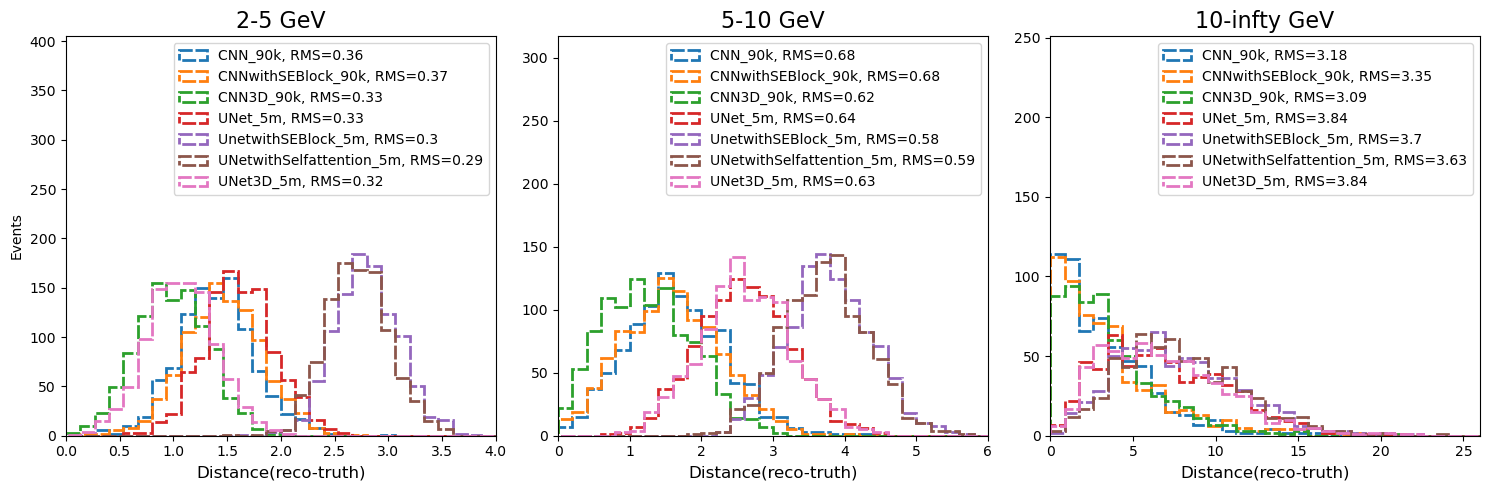

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# 结构体表示每种方法的属性
class MethodData:
    def __init__(self, name, color, linestyle, linewidth, rms, data=None):
        self.name = name
        self.color = color
        self.linestyle = linestyle
        self.linewidth = linewidth
        self.rms = rms
        self.data = data if data is not None else []

# 读取数据文件的函数
def load_data_from_file(file_path):
    """
    读取文本文件数据（假设每行数据为数字）
    文件格式假设为：每行包含数据，代表每个不同的分布
    """
    data = np.loadtxt(file_path)
    mean = np.mean(data)
    std_dev = np.std(data)
    print(f"文件: {file_path} -> 均值: {mean:.2f}, 方差: {std_dev:.2f}")
    return data, std_dev

# 方法的配置
methods = {
    "CNN_90k":                  MethodData(name="CNN_90k", color="C0", linestyle=(5,(5,1)), linewidth=2, rms=[0.36, 0.68, 0.09, 0.08]),
    "CNNwithSEBlock_90k":       MethodData(name="CNNwithSEBlock_90k", color="C1", linestyle=(5,(5,1)), linewidth=2, rms=[0.20, 0.15, 0.10, 0.09]),
    "CNN3D_90k":                MethodData(name="CNN3D_90k", color="C2", linestyle=(5,(5,1)), linewidth=2, rms=[0.23, 0.16, 0.11, 0.10]),
    "UNet_5m":                  MethodData(name="UNet_5m", color="C3", linestyle=(5,(5,1)), linewidth=2, rms=[0.22, 0.16, 0.12, 0.11]),
    "UnetwithSEBlock_5m":       MethodData(name="UnetwithSEBlock_5m", color="C4", linestyle=(5,(5,1)), linewidth=2, rms=[0.22, 0.16, 0.12, 0.11]),
    "UNetwithSelfattention_5m": MethodData(name="UNetwithSelfattention_5m", color="C5", linestyle=(5,(5,1)), linewidth=2, rms=[0.22, 0.16, 0.12, 0.11]),
    "UNet3D_5m":                MethodData(name="UNet3D_5m", color="C6", linestyle=(5,(5,1)), linewidth=2, rms=[0.22, 0.16, 0.12, 0.11]),
}

# 假设能源区间
energies = ["2-5", "5-10", "10-infty"]

# 读取每个方法的实际数据
for method_name, method in methods.items():
    for i, energy in enumerate(energies):
        # 构造文件路径
        file_name = f"{method_name}_barycenter_shift_{energy.replace('-', 'to')}.txt"
        file_path = os.path.join("plot", file_name)
        
        # 检查文件是否存在并加载数据
        if os.path.exists(file_path):
            data, std_dev = load_data_from_file(file_path)
            std_dev = round(std_dev, 2)  # 保留两位小数
            method.data.append(data)  # 保存数据
            method.rms[i] = std_dev   # 更新 rms 数值
        else:
            print(f"警告：文件 {file_path} 未找到")

# 绘制图形
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False)
bins_range = [4, 6, 26, 20]
for i, ax in enumerate(axes):
    max_hight = 0
    max_width = 0
    for j, (method_name, method) in enumerate(methods.items()):
        # 获取每个方法在该能量区间的数据
        data = method.data[i] if len(method.data) > i else []
        
        hist = ax.hist(data,
                bins=30,
                range=(0, bins_range[i]),
                histtype='step',
                color=method.color,
                linestyle=method.linestyle,
                linewidth=method.linewidth,
                label=f"{method_name}, RMS={method.rms[i]}")
        if len(hist[0]) > 0 and max(hist[0]) > max_hight:
            max_hight = max(hist[0])
        if len(hist[1]) > 0 and max(hist[1]) > max_width:
            max_width = max(hist[1])

    ax.set_title(f"{energies[i]} GeV", fontsize=16)
    ax.set_xlabel("Distance(reco-truth)", fontsize=12)
    if i == 0:
        ax.set_ylabel("Events")
    ax.set_xlim(0, max_width)
    ax.set_ylim(0, max_hight * 2.2)

    ax.legend(loc="upper right")

plt.tight_layout()

plt.savefig("distance_comparison.svg", format="svg")  

plt.show()